How I’d Screen a Data Science Candidate in 15 Minutes

If I had only 15 minutes to screen a data science candidate, here’s exactly what I’d do:

1. Ask them to walk me through one project from start to finish.
 • Not just the model - the problem context, tradeoffs, business impact.
 • I’m listening for ownership and clarity, not buzzwords.

2. Ask: “What would you do differently if you had to redo that project?”
 • Reveals depth of thinking and ability to reflect/learn - not just follow a notebook.

3. Quick scenario: “You deploy a model that underperforms in prod. What do you check first?”
 • No perfect answer - I’m looking for prioritization and systems thinking.

In 15 minutes, I’m not testing their full skill set. I’m testing for judgment, communication, and signals of real-world experience.

What’s your favorite quick screen question?

In [553]:
from plotly import express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd

In [626]:
import warnings
warnings.simplefilter("ignore")

In [687]:
# Ternary plot 2025
df25 = pd.read_csv("HouseFirstPrefsByCandidateByVoteTypeDownload-31496.csv")
df25 = df25[['DivisionNm','PartyNm','TotalVotes']]

df25['PartyNm'] = df25['PartyNm'].apply(lambda x: 'coalition2025' if x in ['Liberal', 'The Nationals', 'LNP', 'National Party', 'NT CLP'] 
                      else x)
df25['PartyNm'] = df25['PartyNm'].apply(lambda x: 'labor2025' if x in ['Australian Labor Party (Northern Territory) Branch', 'Australian Labor Party', 'Labor'] 
                      else x)
df25['PartyNm'] = df25['PartyNm'].apply(lambda x: 'third2025' if x not in ['coalition2025', 'labor2025'] 
                      else x)

# Each set of votes
df25 = df25.groupby(['DivisionNm','PartyNm'])['TotalVotes'].sum().reset_index()

df25.columns = ['seat', 'party', 'votes2025']

df25_totals = df25.groupby(['seat'])['votes2025'].sum().to_dict()

df25['votes2025'] = df25.apply(lambda x: x.votes2025/(df25_totals[x.seat]), axis=1)

df25_p = df25.pivot(index='seat', columns='party', values='votes2025')

df25_p.head(3)

party     coalition2025  labor2025  third2025
seat                                         
Adelaide       0.232535   0.447308   0.320157
Aston          0.357781   0.353838   0.288381
Ballarat       0.275432   0.408065   0.316503

In [803]:
df22 = pd.read_csv("HouseFirstPrefsByCandidateByVoteTypeDownload-27966.csv")
df_wow = df22[['StateAb', 'DivisionNm']]
state_dict = df_wow.set_index('DivisionNm').to_dict()
state_dict = state_dict.get('StateAb')

In [688]:
# Ternary plot 2022
df22 = pd.read_csv("HouseFirstPrefsByCandidateByVoteTypeDownload-27966.csv")
df22 = df22[['DivisionNm', 'PartyAb', 'TotalVotes']]

df22['PartyAb'] = df22['PartyAb'].apply(lambda x: 'coalition2022' if x in ['LNP', 'LP', 'NP', 'NT CLP'] 
                      else x)
df22['PartyAb'] = df22['PartyAb'].apply(lambda x: 'labor2022' if x in ['ALP'] 
                      else x)
df22['PartyAb'] = df22['PartyAb'].apply(lambda x: 'third2022' if x not in ['coalition2022', 'labor2022'] 
                      else x)
# vote counts
df22 = df22.groupby(['DivisionNm','PartyAb'])['TotalVotes'].sum().reset_index()

df22.columns = ['seat', 'party', 'votes2022']

df22_totals = df22.groupby(['seat'])['votes2022'].sum().to_dict()

df22['votes2022'] = df22.apply(lambda x: x.votes2022/(df22_totals[x.seat]), axis=1)

df22_p = df22.pivot(index='seat', columns='party', values='votes2022')

df22_p.head(3)

party     coalition2022  labor2022  third2022
seat                                         
Adelaide       0.307845   0.384686   0.307469
Aston          0.416437   0.314831   0.268733
Ballarat       0.257280   0.424874   0.317846

In [689]:
winners25 = pd.read_csv("HouseMembersElectedDownload-31496.csv")
winners25 = winners25[['DivisionNm', 'PartyAb']]

winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'coalition' if x in ['LNP', 'LP', 'CLP'] 
                      else x)
winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'nats' if x in ['NP'] 
                      else x)
winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'labor' if x in ['ALP'] 
                      else x)
winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'teals' if x in ['IND', 'XEN'] 
                      else x)
winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'katter' if x in ['KAP'] 
                      else x)
winners25['PartyAb'] = winners25['PartyAb'].apply(lambda x: 'greens' if x in ['GRN'] 
                      else x)

winners25.columns = ['seat', 'winner25']
winners25 = winners25.set_index('seat')

In [690]:
winners22 = pd.read_csv("HouseMembersElectedDownload-27966.csv")
winners22 = winners22[['DivisionNm', 'PartyAb']]

winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'coalition' if x in ['LNP', 'LP'] 
                      else x)
winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'nats' if x in ['NP'] 
                      else x)
winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'labor' if x in ['ALP'] 
                      else x)
winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'teals' if x in ['IND', 'XEN'] 
                      else x)
winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'katter' if x in ['KAP'] 
                      else x)
winners22['PartyAb'] = winners22['PartyAb'].apply(lambda x: 'greens' if x in ['GRN'] 
                      else x)

winners22.columns = ['seat', 'winner22']
winners22 = winners22.set_index('seat')

In [691]:
df = pd.concat([df25_p, df22_p, winners25, winners22],axis=1)

df = df.drop(['Higgins', 'North Sydney', 'Bullwinkel'])

df.loc['Fowler', 'winner22'] = 'independent'
df.loc['Fowler', 'winner25'] = 'independent'
df.loc['Mayo','winner22'] = 'independent'
df.loc['Mayo','winner25'] = 'independent'
df.loc['Clark','winner22'] = 'independent'
df.loc['Clark','winner25'] = 'independent'

In [692]:
df = df.reset_index()

df['flip'] = df.winner25 != df.winner22

df.head(3)

seat  coalition2025  labor2025  third2025  coalition2022  labor2022  \
0  Adelaide       0.232535   0.447308   0.320157       0.307845   0.384686   
1     Aston       0.357781   0.353838   0.288381       0.416437   0.314831   
2  Ballarat       0.275432   0.408065   0.316503       0.257280   0.424874   

   third2022 winner25   winner22   flip  
0   0.307469    labor      labor  False  
1   0.268733    labor  coalition   True  
2   0.317846    labor      labor  False

In [752]:
color_map = {
    'coalition': '#0047AB',    # Blue
    'nats': '#006400',
    'labor': '#FF0000',        # Red  
    'greens': '#00FF00',     # Green
    'centre': '#FFA500',
    'independent': '#B2BEB5',
    'katter': '#964B00', 
    'teals': '#069494',
    'LEADER': '#FFFFFF'
}

def get_party_color(winner):
    party_colors = {
        'coalition': '#0047AB',
        'nats': '#006400',
        'labor': '#DE3533', 
        'greens': '#00FF00',   # Green
        'centre': '#FFA500',
        'independent': '#B2BEB5',
        'katter': '#964B00', 
        'teals': '#069494',
        'LEADER': '#FFFFFF'
    }
    return party_colors.get(winner)

In [694]:
# Create a mesh for the background gradient
n_points = 50  # Resolution of the gradient
a_vals = []
b_vals = []
c_vals = []
colors = []

for i in range(n_points):
    for j in range(n_points - i):
        k = n_points - i - j - 1
        if k >= 0:
            # Normalize to sum to 1
            total = i + j + k
            if total > 0:
                a = i / total
                b = j / total  
                c = k / total
                
                a_vals.append(a)
                b_vals.append(b)
                c_vals.append(c)
                
                # Color based on position (RGB values 0-255)
                red = int(255 * a)      # Red intensity based on coalition strength
                grey = int(99 * b)    # Green intensity based on labor strength  
                # Use grey/black for third party instead of blue
                blue = int(255 * c)     # Grey intensity based on third party strength (128 = mid-grey)
                
                colors.append(f'rgb({red},{grey},{blue})')

In [727]:
THRESHOLD = 0.00
df['labor_swing'] = df['labor2025'] - df['labor2022'] > THRESHOLD
df['coalition_swing'] = df['coalition2025'] - df['coalition2022'] > THRESHOLD
df['third_swing'] = df['third2025'] - df['third2022'] > THRESHOLD

In [751]:
df.loc[107,'winner25'] = 'LEADER'
df.loc[41,'winner25'] = 'LEADER'

In [728]:
df.to_csv('ternary.csv')

In [729]:
df1 = pd.read_csv('ternary.csv', index_col=0)

In [747]:
df_flip = df1[df1['flip']]

In [741]:
df_third_swing = df1[(df1['third_swing']) & (~df1['coalition_swing']) & (~df1['labor_swing'])]
df_coalition_swing = df1[(~df1['third_swing']) & (df1['coalition_swing']) & (~df1['labor_swing'])]
df_labor_swing = df1[(~df1['third_swing']) & (~df1['coalition_swing']) & (df1['labor_swing'])]

df_third_swing_against = df1[(~df1['third_swing']) & (df1['coalition_swing']) & (df1['labor_swing'])]
df_coalition_swing_against = df1[(df1['third_swing']) & (~df1['coalition_swing']) & (df1['labor_swing'])]
df_labor_swing_against = df1[(df1['third_swing']) & (df1['coalition_swing']) & (~df1['labor_swing'])]

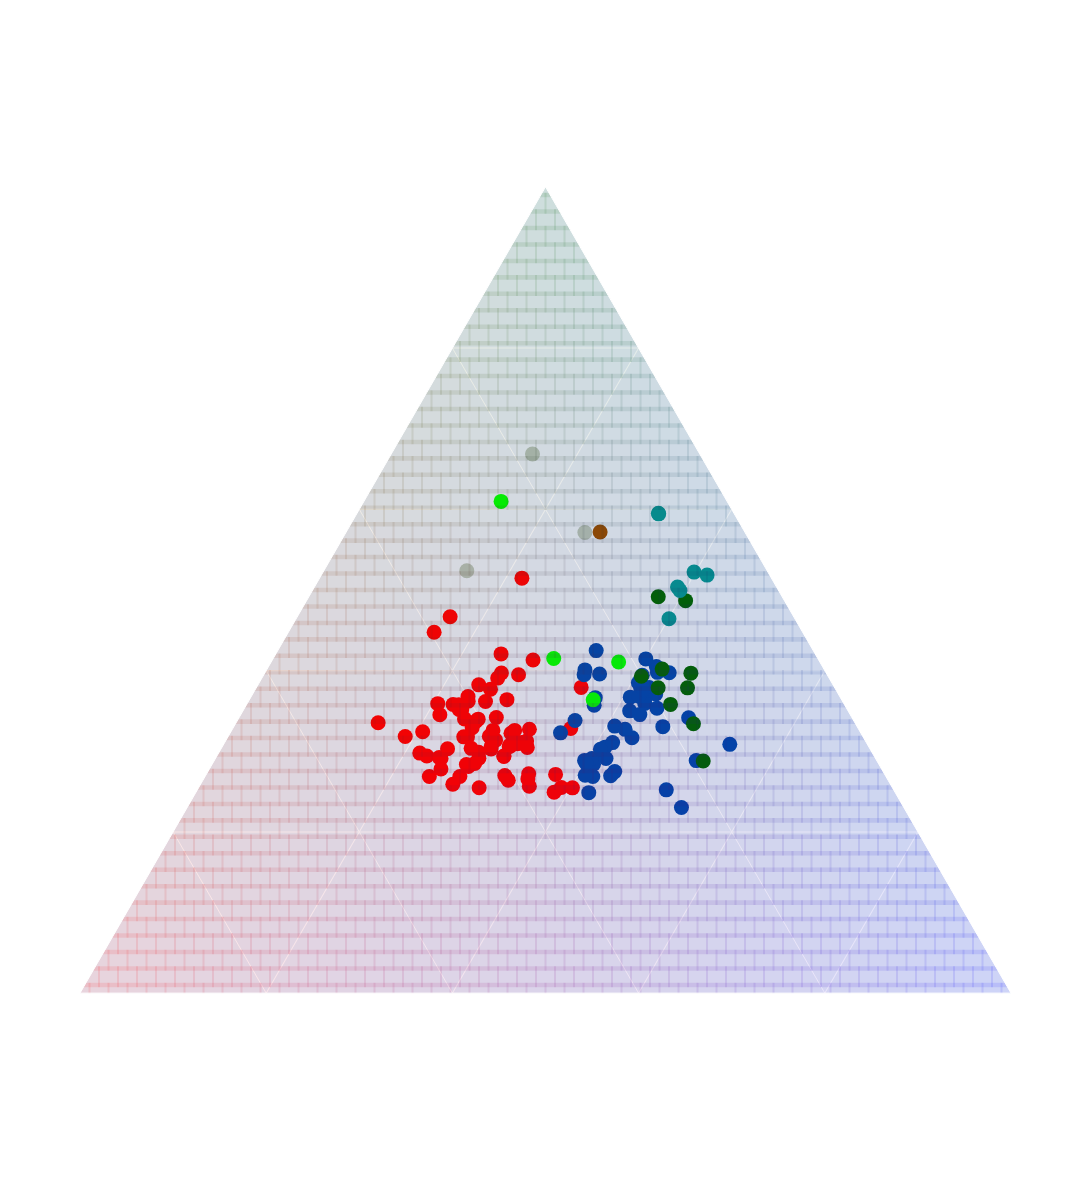

In [787]:
fig = px.scatter_ternary(df1, a='third2022', b='labor2022',c='coalition2022', 
                         color='winner22', color_discrete_map=color_map, hover_name='seat',
                         width=1200, height=1200)


# Add background mesh
fig.update_layout(showlegend=False)
fig.update_traces(marker=dict(size=15)) 
fig.update_layout({
    'ternary': {
        'sum': 1,
        'caxis': {'title': '', 'titlefont': {'color': 'blue', 'size': 25}, 'showticklabels':False},
        'baxis': {'title': '', 'titlefont': {'color': 'red', 'size': 25}, 'showticklabels':False},
        'aaxis': {'title': '', 'titlefont': {'color': 'teal', 'size': 25}, 'showticklabels':False}
    }
})
fig.add_trace(go.Scatterternary({
    'mode': 'markers',
    'b': a_vals,
    'a': b_vals,
    'c': c_vals,
    'marker': {
        'color': colors,
        'size': 21,
        'opacity': 0.1,
        'symbol': 'square' 
    },
    'showlegend': False,
    'hoverinfo': 'skip'
}))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot background
)
fig.update_traces()

87


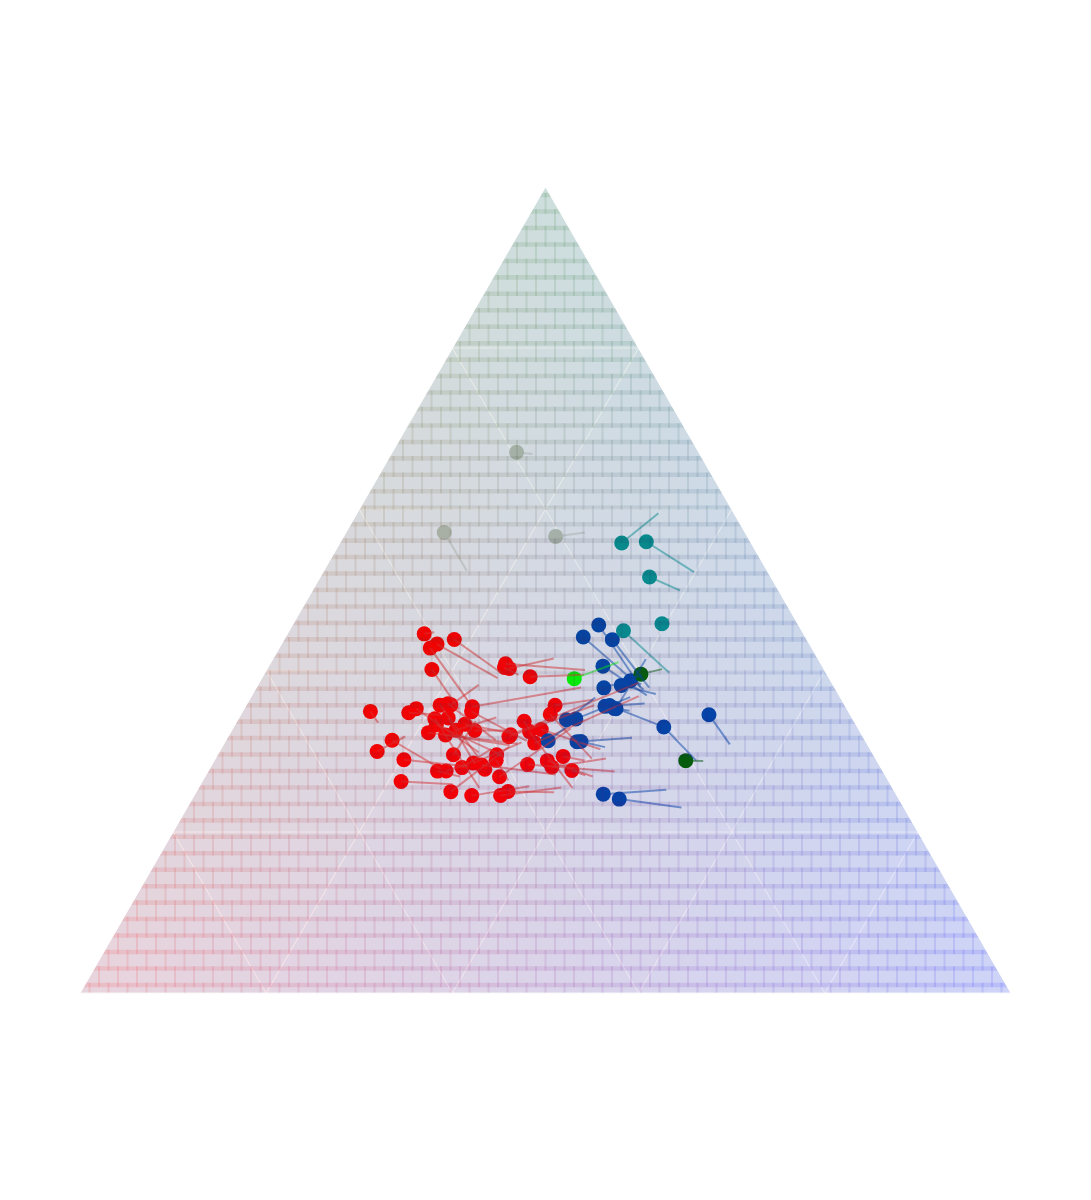

In [784]:
#df_show = pd.concat([df_coalition_swing, df_labor_swing_against])
df_show = pd.concat([df_coalition_swing_against, df_labor_swing])
print(len(df_show))

fig = px.scatter_ternary(df_show, a='third2025', b='labor2025',c='coalition2025', 
                         color='winner25', color_discrete_map=color_map, hover_name='seat',
                         width=1200, height=1200)

fig.update_traces():

for row in df_show.iterrows():
    row = row[1]
    point_a = row[1:4]
    point_b = row[4:7]

    seat_name = row[0]
    winner25 = row[7]
    winner22 = row[8]
    
    fig.add_trace(go.Scatterternary({
    'name':seat_name,
    'mode': 'lines',
    'c': [point_a[0], point_b[0],],
    'b': [point_a[1], point_b[1],], 
    'a': [point_a[2], point_b[2],],
    'marker': {'color':  get_party_color(winner25)},
    'opacity': 0.5   
    }))

# Add background mesh
fig.update_traces(marker=dict(size=15)) 

fig.update_layout({
    'ternary': {
        'sum': 1,
        'caxis': {'title': '', 'titlefont': {'color': 'blue', 'size': 25}, 'showticklabels':False},
        'baxis': {'title': '', 'titlefont': {'color': 'red', 'size': 25}, 'showticklabels':False},
        'aaxis': {'title': '', 'titlefont': {'color': 'teal', 'size': 25}, 'showticklabels':False}
    }
})

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot background
)

fig.update_layout(showlegend=False)

fig.add_trace(go.Scatterternary({
    'mode': 'markers',
    'b': a_vals,
    'a': b_vals,
    'c': c_vals,
    'marker': {
        'color': colors,
        'size': 21,
        'opacity': 0.1,
        'symbol': 'square' 
    },
    'showlegend': False,
    'hoverinfo': 'skip'
}))

fig.show()

In [805]:
df['state'] = df.seat.apply(lambda x: state_dict.get(x))

46


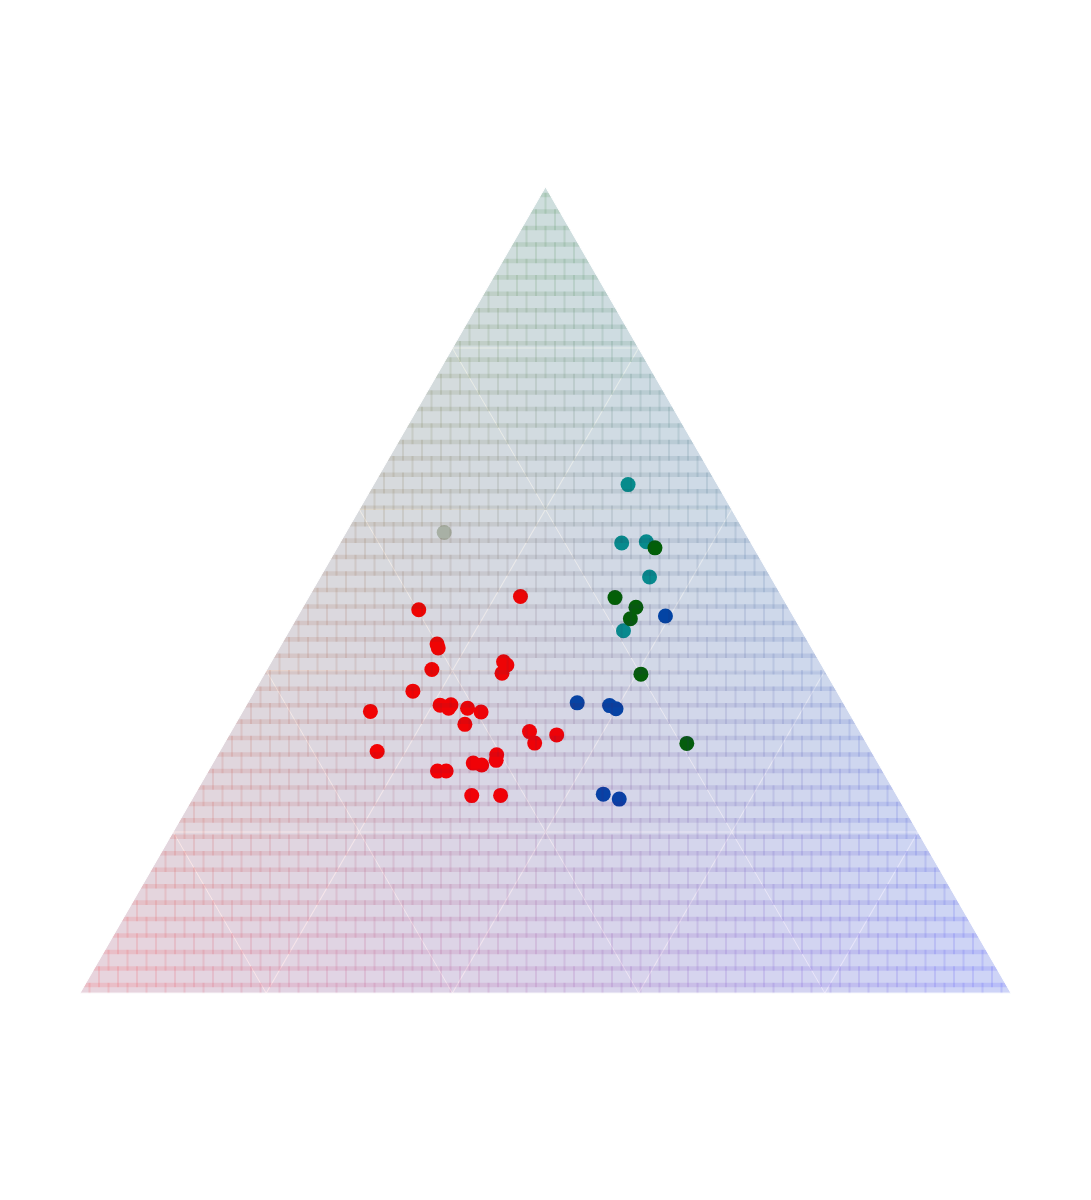

In [853]:
#df_show = pd.concat([df_coalition_swing, df_labor_swing_against])
df_show = df[df.state=='NSW']
print(len(df_show))

fig = px.scatter_ternary(df_show, a='third2025', b='labor2025',c='coalition2025', 
                         color='winner25', color_discrete_map=color_map, hover_name='seat',
                         width=1200, height=1200)

fig.update_traces()


# Add background mesh
fig.update_traces(marker=dict(size=15)) 

fig.update_layout({
    'ternary': {
        'sum': 1,
        'caxis': {'title': '', 'titlefont': {'color': 'blue', 'size': 25}, 'showticklabels':False},
        'baxis': {'title': '', 'titlefont': {'color': 'red', 'size': 25}, 'showticklabels':False},
        'aaxis': {'title': '', 'titlefont': {'color': 'teal', 'size': 25}, 'showticklabels':False}
    }
})

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot background
)

fig.update_layout(showlegend=False)

fig.add_trace(go.Scatterternary({
    'mode': 'markers',
    'b': a_vals,
    'a': b_vals,
    'c': c_vals,
    'marker': {
        'color': colors,
        'size': 21,
        'opacity': 0.1,
        'symbol': 'square' 
    },
    'showlegend': False,
    'hoverinfo': 'skip'
}))

fig.show()

In [829]:
df_move = df[['coalition2025','labor2025','third2025','coalition2022','labor2022','third2022', 'seat', 'winner22', 'winner25']]

In [836]:
df_move['movement_coalition'] = (df['coalition2025'] - df['coalition2022'])/5
df_move['movement_labor'] = (df['labor2025'] - df['labor2022'])/5
df_move['movement_third'] = (df['third2025'] - df['third2022'])/5

In [873]:
df_move

coalition2025  labor2025  third2025  coalition2022  labor2022  third2022  \
0         0.232535   0.447308   0.320157       0.307845   0.384686   0.307469   
1         0.357781   0.353838   0.288381       0.416437   0.314831   0.268733   
2         0.275432   0.408065   0.316503       0.257280   0.424874   0.317846   
3         0.351878   0.327827   0.320295       0.422151   0.329215   0.248633   
4         0.461997   0.207849   0.330154       0.517650   0.193953   0.288397   
..             ...        ...        ...            ...        ...        ...   
144       0.255015   0.337951   0.407034       0.276576   0.359413   0.364010   
145       0.254964   0.348360   0.396676       0.268313   0.428079   0.303608   
146       0.373343   0.247995   0.378662       0.406768   0.198930   0.394301   
147       0.122912   0.340065   0.537023       0.164191   0.369057   0.466753   
148       0.319661   0.238551   0.441787       0.417203   0.206472   0.376324   

         seat   winner22   winner25  movement_coalition  movement_labor  \
0    Adelaide      labor      labor           -0.015062        0.012524   
1       Aston  coalition      labor           -0.011731        0.007802   
2    Ballarat      labor      labor            0.003630       -0.003362   
3       Banks  coalition      labor           -0.014055       -0.000278   
4      Barker  coalition  coalition           -0.011131        0.002779   
..        ...        ...        ...                 ...             ...   
144   Werriwa      labor      labor           -0.004312       -0.004292   
145   Whitlam      labor      labor           -0.002670       -0.015944   
146  Wide Bay  coalition  coalition           -0.006685        0.009813   
147     Wills      labor      labor           -0.008256       -0.005798   
148    Wright  coalition  coalition           -0.019508        0.006416   

     movement_third     third     labor  coalition  
0          0.002537  0.320157  0.447308   0.232535  
1          0.003930  0.288381  0.353838   0.357781  
2         -0.000269  0.316503  0.408065   0.275432  
3          0.014332  0.320295  0.327827   0.351878  
4          0.008352  0.330154  0.207849   0.461997  
..              ...       ...       ...        ...  
144        0.008605  0.407034  0.337951   0.255015  
145        0.018614  0.396676  0.348360   0.254964  
146       -0.003128  0.378662  0.247995   0.373343  
147        0.014054  0.537023  0.340065   0.122912  
148        0.013093  0.441787  0.238551   0.319661  

[149 rows x 15 columns]

In [882]:
row

coalition2025          0.319661
labor2025              0.238551
third2025              0.441787
coalition2022          0.417203
labor2022              0.206472
third2022              0.376324
seat                     Wright
winner22              coalition
winner25              coalition
movement_coalition    -0.019508
movement_labor         0.006416
movement_third         0.013093
third                  0.441787
labor                  0.238551
coalition              0.319661
Name: 148, dtype: object

0


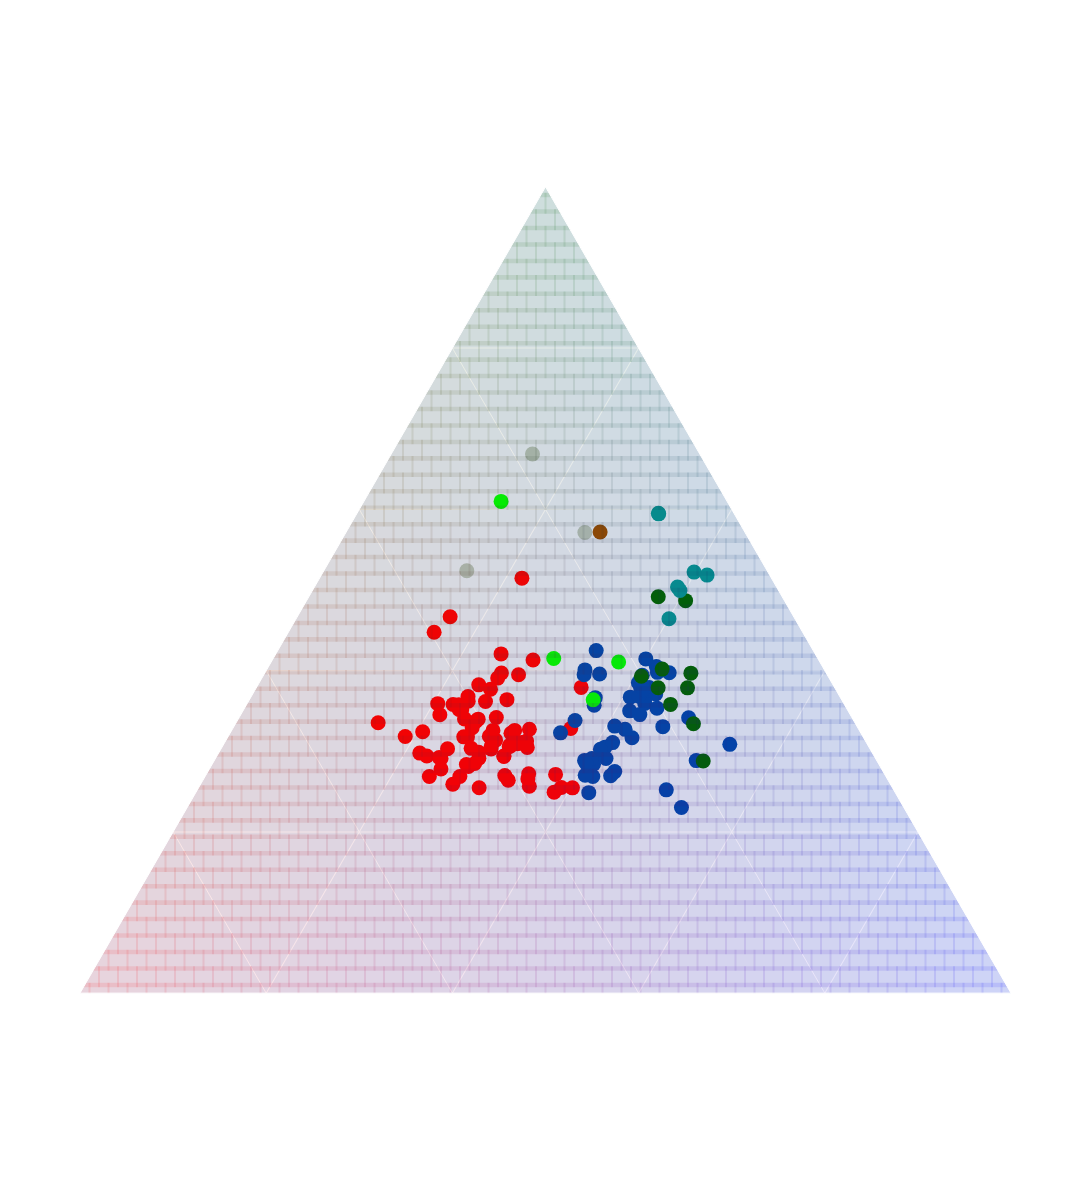

1


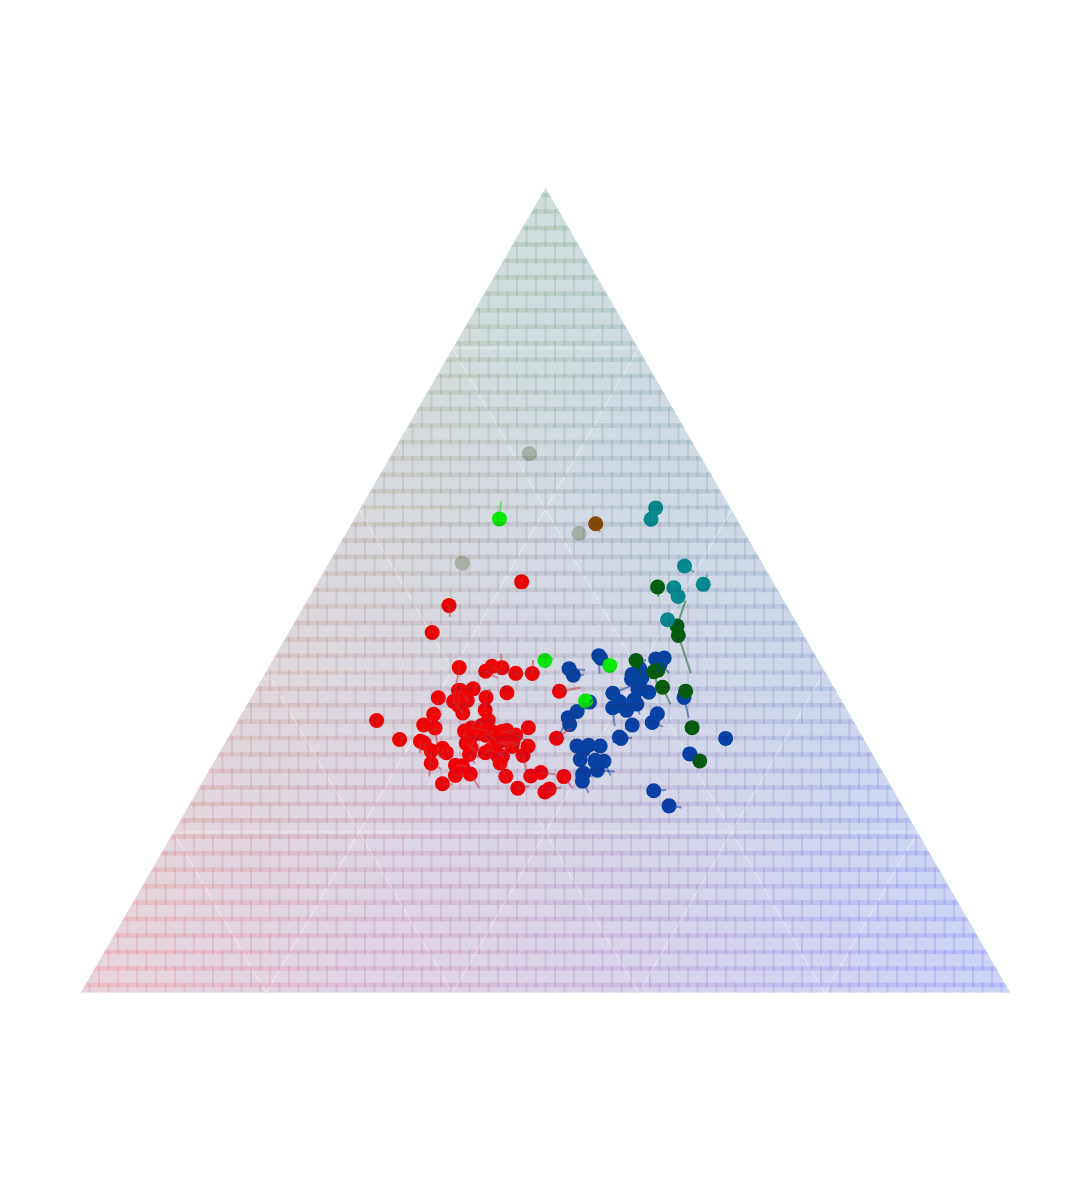

2


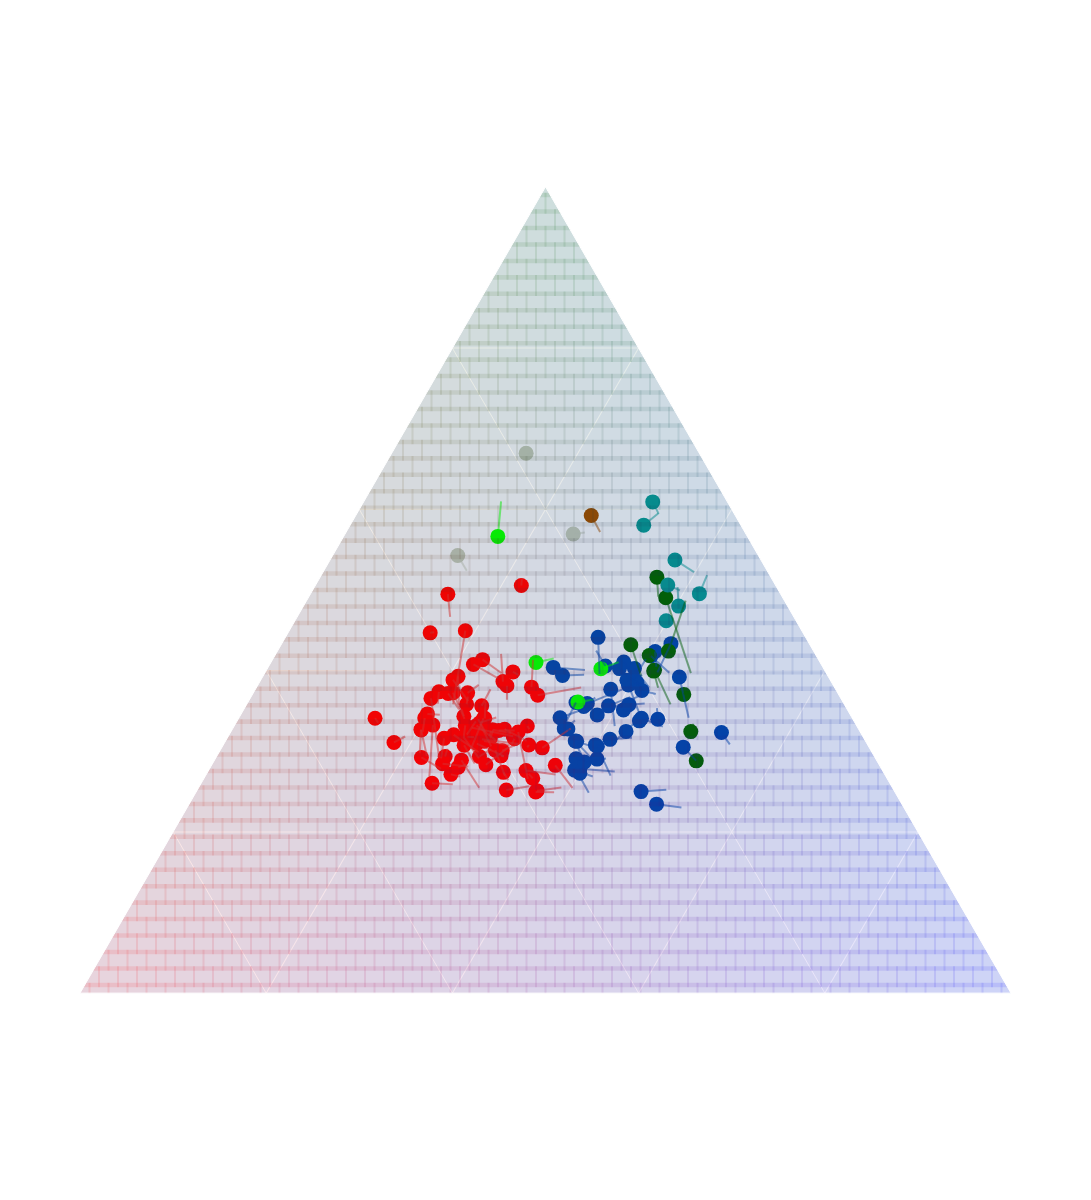

3


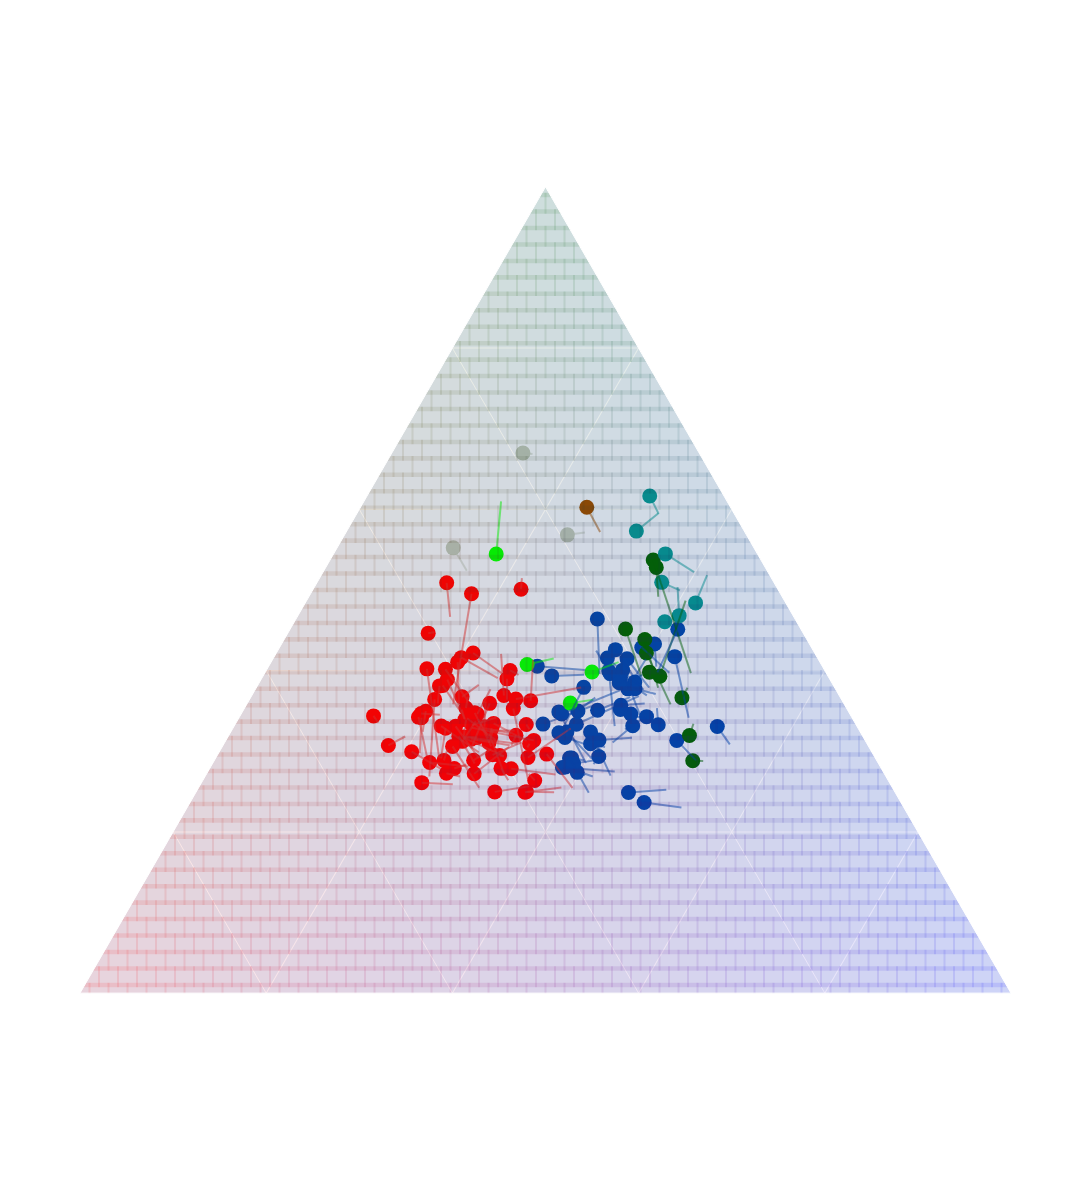

4


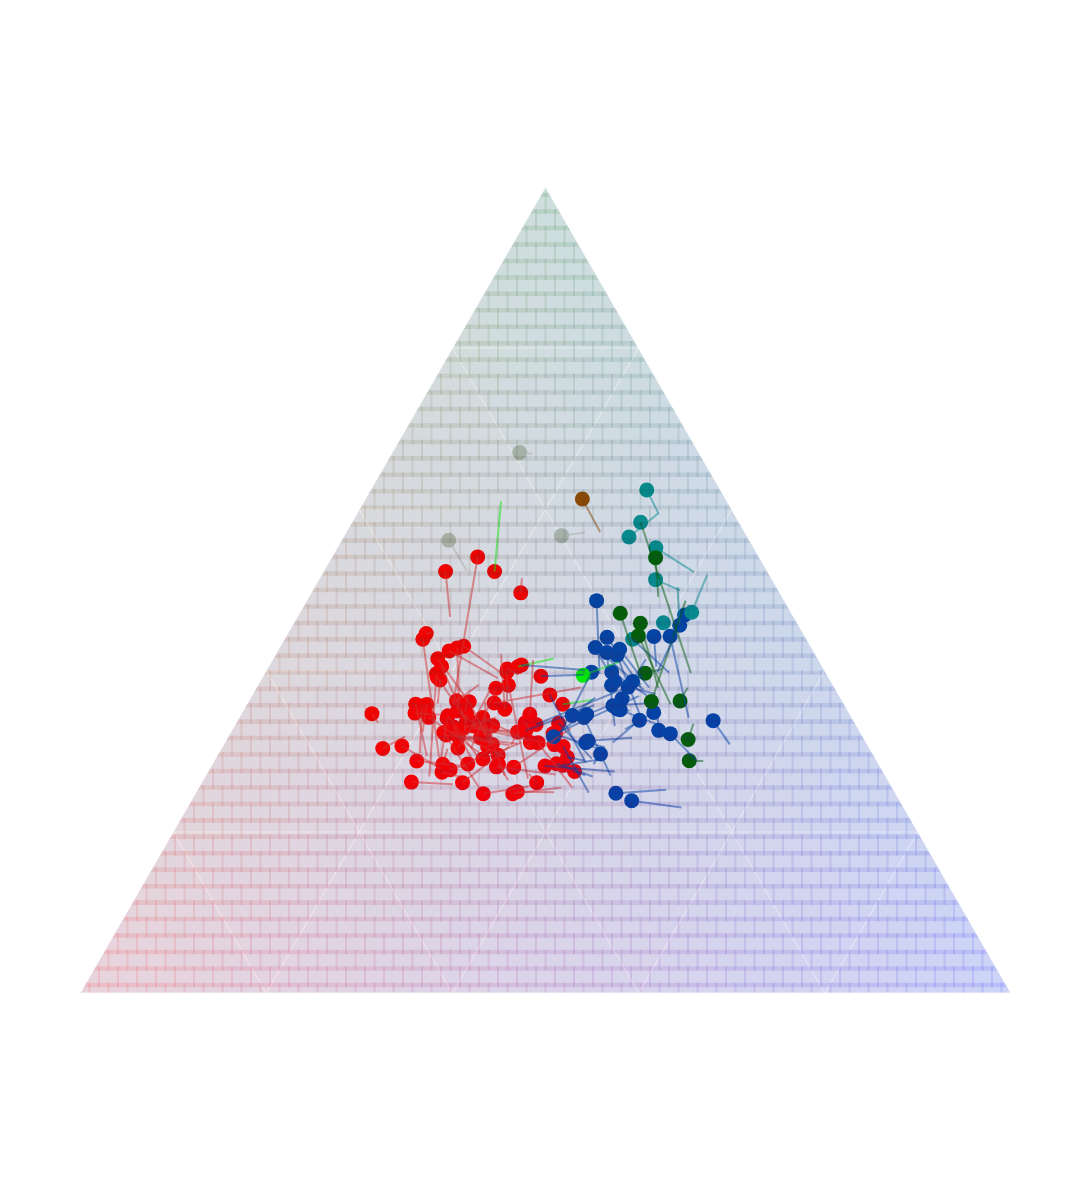

5


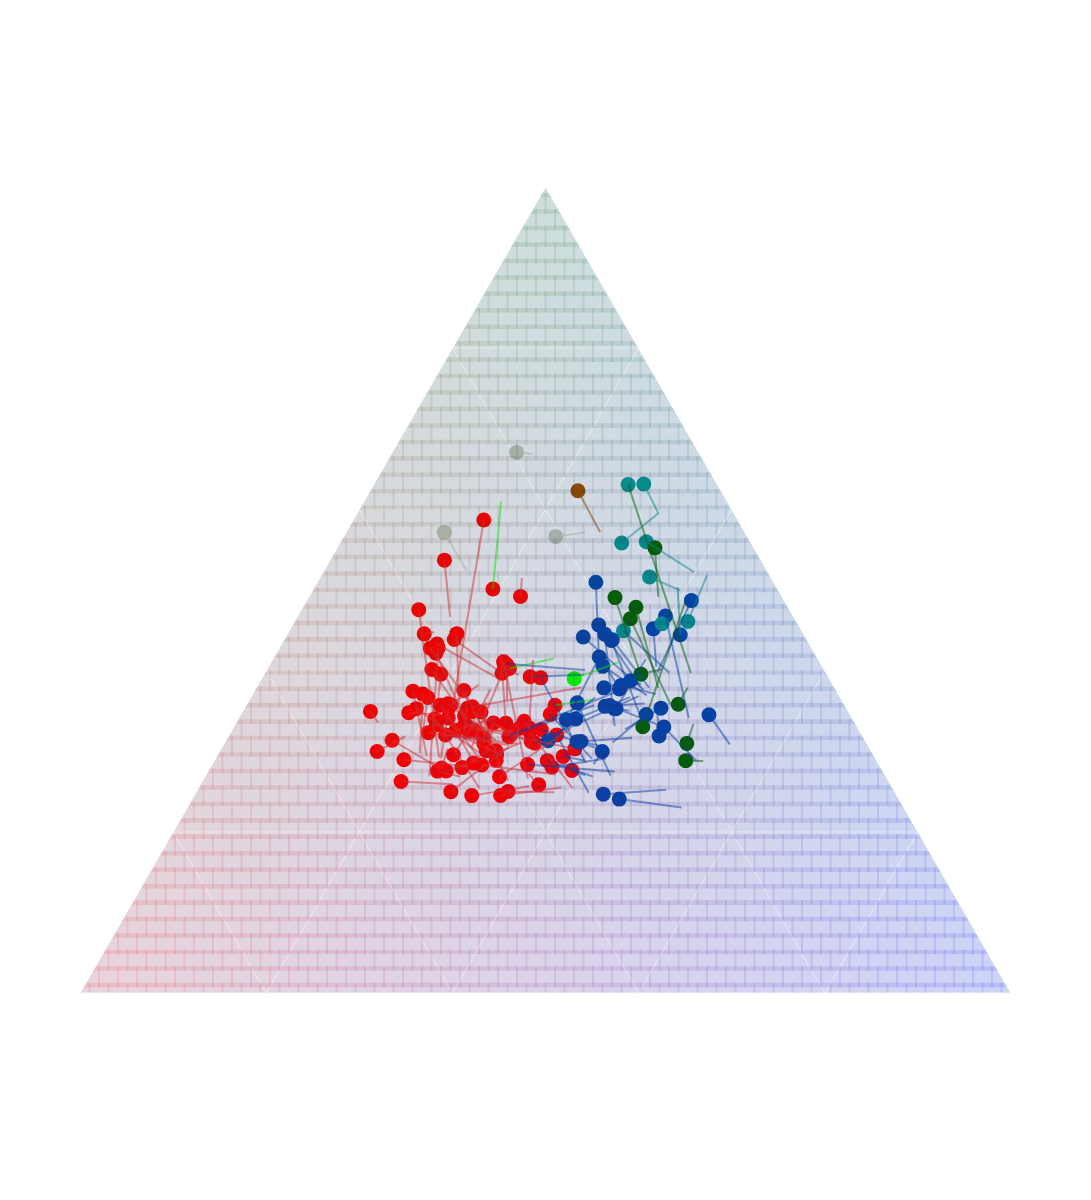

In [883]:
for x in [0,1,2,3,4,5]:
    #if x in [0,1,2,3,4]: continue #remove
        
    df_move['coalition'] = df_move['coalition2022'] + df_move['movement_coalition']*x
    df_move['labor'] = df_move['labor2022'] + df_move['movement_labor']*x
    df_move['third'] = df_move['third2022'] + df_move['movement_third']*x

    if x<=3: winner = 'winner22'
    else: winner = 'winner25'
    df_show = df_move
    print(x)
    
    fig = px.scatter_ternary(df_show, a='third', b='labor',c='coalition', 
                             color=winner, color_discrete_map=color_map, hover_name='seat',
                             width=1200, height=1200)
    
    fig.update_traces()
    
    for row in df_show.iterrows():
        row = row[1]
        point_a = row[-3:]
        point_b = row[3:6]
        
        seat_name = row[0]
        winner25 = row[8]
        winner22 = row[7]
        
        fig.add_trace(go.Scatterternary({
            'name':seat_name,
            'mode': 'lines',
            'c': [point_a[2], point_b[0],],
            'b': [point_a[1], point_b[1],], 
            'a': [point_a[0], point_b[2],],
            'marker': {'color':  get_party_color(winner22)},
            'opacity': 0.5   
            }))

    
    # Add background mesh
    fig.update_traces(marker=dict(size=15)) 
    
    fig.update_layout({
        'ternary': {
            'sum': 1,
            'caxis': {'title': '', 'titlefont': {'color': 'blue', 'size': 25}, 'showticklabels':False},
            'baxis': {'title': '', 'titlefont': {'color': 'red', 'size': 25}, 'showticklabels':False},
            'aaxis': {'title': '', 'titlefont': {'color': 'teal', 'size': 25}, 'showticklabels':False}
        }
    })
    
    fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
        plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot background
    )
    
    fig.update_layout(showlegend=False)
    
    fig.add_trace(go.Scatterternary({
        'mode': 'markers',
        'b': a_vals,
        'a': b_vals,
        'c': c_vals,
        'marker': {
            'color': colors,
            'size': 21,
            'opacity': 0.1,
            'symbol': 'square' 
        },
        'showlegend': False,
        'hoverinfo': 'skip'
    }))
    
    fig.show()